using a single method for image conversion   
(as in `fringeprocess.im2greyarray`) 
look at fringe fraction differences for square images 
with and without holes

In [9]:
from pathlib import Path


from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
import matplotlib


from ls_fringeapp import fringeprocess as fp
from ls_fringeapp.load_equipment_data import repo_folder
from ls_fringeapp import plot_helpers as ph

In [2]:
TEST_DATA_DIR = repo_folder / "tests" / "data"
data = np.genfromtxt(
    TEST_DATA_DIR / "fflog_to_test_2025-11-11.txt", delimiter="\t", dtype="str"
)

In [5]:
def test_square_ffrac(row):
    """
    calculate fringe fraction for diffrent image processing
    """
    # data from a row in fflog.txt
    ffrac_file = float(row[0])
    img_filename = TEST_DATA_DIR / row[1]
    xygb = row[2:8].astype(float)
    xygb = xygb.reshape((3, 2))

    img = Image.open(img_filename)

    # original image with original border
    ffrac = fp.array2frac(
        fp.img2greyarray(img),
        xygb,
        drawinfo=False,
        border=(0.2, 0.1),
    )

    # original image with smaller border in  gauge length direction
    ffrac_small_border = fp.array2frac(
        fp.img2greyarray(img),
        xygb,
        drawinfo=False,
        border=(0.1, 0.1),
    )

    img_sq, xy_sq = ph.make_square_gauge(img, xygb)
    # get ffrac for square image with no hole
    ffrac_sq = fp.array2frac(
        fp.img2greyarray(img_sq),
        xy_sq,
        drawinfo=False,
        border=(0.1, 0.1),
    )
    # add blurred hole
    img_hole = ph.blur_gauge_hole(img_sq, xy_sq, circle_radius=0.25)
    ffrac_hole = fp.array2frac(
        fp.img2greyarray(img_hole),
        xy_sq,
        drawinfo=False,
        border=(0.1, 0.1),
        circle_radius=0.27,
    )
    return ffrac_file, ffrac, ffrac_small_border, ffrac_sq, ffrac_hole

In [6]:
ffracs = []
for row in data:
    ffs_img = test_square_ffrac(row)
    ffracs.append(ffs_img)
ffracs = np.array(ffracs)
ffracs

array([[0.303952  , 0.30395152, 0.29456635, 0.30110327, 0.26948675],
       [0.510216  , 0.51021629, 0.50691159, 0.53872159, 0.52511718],
       [0.703969  , 0.70396858, 0.70549434, 0.7236564 , 0.72788373],
       [0.119988  , 0.11998809, 0.11194592, 0.15219638, 0.11060932],
       [0.606559  , 0.60655908, 0.60803957, 0.62496891, 0.63647211],
       [0.906025  , 0.90602474, 0.90383784, 0.94498481, 0.9387821 ],
       [0.545317  , 0.54531653, 0.54489949, 0.56946757, 0.56972973],
       [0.865337  , 0.86533675, 0.85846034, 0.88176528, 0.84767299],
       [0.039411  , 0.03941088, 0.03039857, 0.04423757, 0.02470222]])

In [17]:
# remove original ffrac as in file
ff_norm = ffracs - ffracs[:, 0:1]


Text(0.5, 1.0, 'Difference from original')

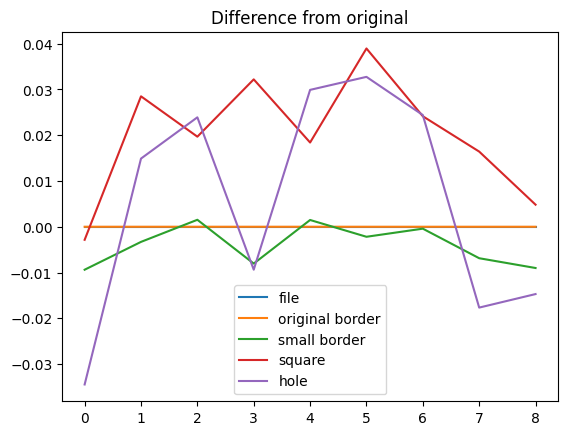

In [16]:
plt.plot(ff_norm, label=["file", "original border", "small border", "square", "hole"])
plt.legend()
plt.title("Difference from original")

These are larger than expected.
Look closer at index =3

In [35]:
max_diff = abs(ff_norm).max()
max_diff_nm = max_diff * 633 / 2
max_diff, max_diff_nm

(np.float64(0.03895981338675014), np.float64(12.33078093690642))

In [36]:
mean_diff = ff_norm.mean()
mean_diff_nm = mean_diff * 633 / 2
mean_diff, mean_diff_nm

(np.float64(0.004306408319879499), np.float64(1.3629782332418614))

In [37]:
std_diff = ff_norm.std(ddof=1)
std_diff_nm = std_diff * 633 / 2
std_diff, std_diff_nm

(np.float64(0.014777105957286993), np.float64(4.676954035481334))

In [19]:
row = data[3]
ffrac_file = float(row[0])
img_filename = TEST_DATA_DIR / row[1]
xygb = row[2:8].astype(float)
xygb = xygb.reshape((3, 2))
img = Image.open(img_filename)


In [23]:
# original image with smaller border in  gauge length direction
ffrac_small_border, drawdata_small_border = fp.array2frac(
    fp.img2greyarray(img),
    xygb,
    drawinfo=True,
    border=(0.1, 0.1),
)

img_sq, xy_sq = ph.make_square_gauge(img, xygb)
# get ffrac for square image with no hole
ffrac_sq, drawdata_sq = fp.array2frac(
    fp.img2greyarray(img_sq),
    xy_sq,
    drawinfo=True,
    border=(0.1, 0.1),
)
# add blurred hole
img_hole = ph.blur_gauge_hole(img_sq, xy_sq, circle_radius=0.25)
ffrac_hole, drawdata_hole = fp.array2frac(
    fp.img2greyarray(img_hole),
    xy_sq,
    drawinfo=True,
    border=(0.1, 0.1),
    circle_radius=0.27,
)

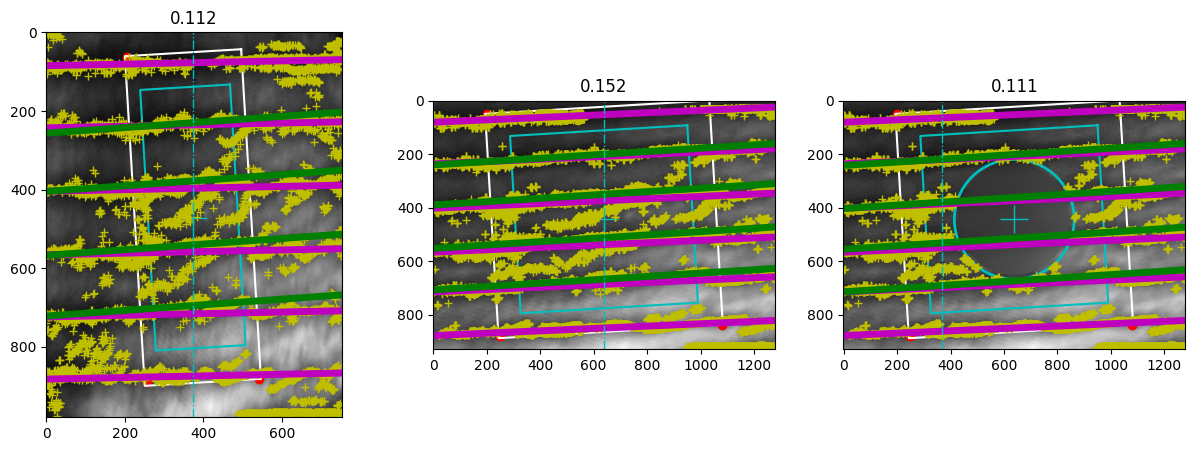

In [ ]:
fig = plt.figure(figsize=(15, 5))


ax1 = fig.add_subplot(131)
ph.draw_gauge(ax1, fp.img2greyarray(img), drawdata_small_border)
ax1.set_title(f"{ffrac_small_border:.3f}")

ax2 = fig.add_subplot(132)
ph.draw_gauge(ax2, fp.img2greyarray(img_sq), drawdata_sq)
ax2.set_title(f"{ffrac_sq:.3f}")

ax3 = fig.add_subplot(133)
ph.draw_gauge(ax3, fp.img2greyarray(img_hole), drawdata_hole)
ax3.set_title(f"{ffrac_hole:.3f}");


In [32]:
row = data[6]
ffrac_file = float(row[0])
img_filename = TEST_DATA_DIR / row[1]
xygb = row[2:8].astype(float)
xygb = xygb.reshape((3, 2))
img = Image.open(img_filename)

In [33]:
# original image with smaller border in  gauge length direction
ffrac_small_border, drawdata_small_border = fp.array2frac(
    fp.img2greyarray(img),
    xygb,
    drawinfo=True,
    border=(0.1, 0.1),
)

img_sq, xy_sq = ph.make_square_gauge(img, xygb)
# get ffrac for square image with no hole
ffrac_sq, drawdata_sq = fp.array2frac(
    fp.img2greyarray(img_sq),
    xy_sq,
    drawinfo=True,
    border=(0.1, 0.1),
)
# add blurred hole
img_hole = ph.blur_gauge_hole(img_sq, xy_sq, circle_radius=0.25)
ffrac_hole, drawdata_hole = fp.array2frac(
    fp.img2greyarray(img_hole),
    xy_sq,
    drawinfo=True,
    border=(0.1, 0.1),
    circle_radius=0.27,
)

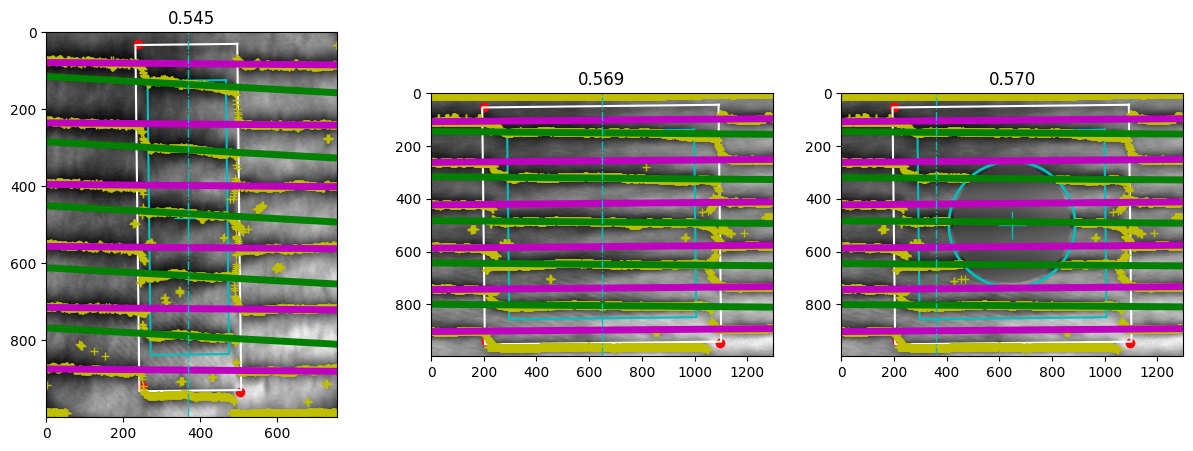

In [34]:
fig = plt.figure(figsize=(15, 5))


ax1 = fig.add_subplot(131)
ph.draw_gauge(ax1, fp.img2greyarray(img), drawdata_small_border)
ax1.set_title(f"{ffrac_small_border:.3f}")

ax2 = fig.add_subplot(132)
ph.draw_gauge(ax2, fp.img2greyarray(img_sq), drawdata_sq)
ax2.set_title(f"{ffrac_sq:.3f}")

ax3 = fig.add_subplot(133)
ph.draw_gauge(ax3, fp.img2greyarray(img_hole), drawdata_hole)
ax3.set_title(f"{ffrac_hole:.3f}");